In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [88]:
df=pd.read_csv("./data/spam.csv", encoding="ISO-8859-1")

In [89]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [5]:
df=df.rename(columns={"v1":"target","v2":"Text"})

In [6]:
df.head(2)

,target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [7]:
df.shape

(5572, 2)

In [8]:
df.isna().sum()

target    0
Text      0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.head(3)

,target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [12]:
df.shape

(5169, 2)

In [13]:
df["target"]=df["target"].map({"ham":0,"spam":1})

In [14]:
df.sample()

,target,Text
900,0,Probably money worries. Things are coming due ...


In [15]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [16]:
plt.style.use('dark_background')

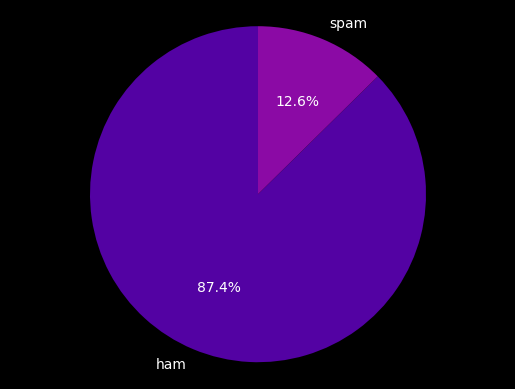

In [17]:
plt.pie(df["target"].value_counts(), labels=["ham","spam"], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('plasma'))
plt.axis('equal') 

plt.show()


In [18]:
df.shape

(5169, 2)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int64 
 1   Text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


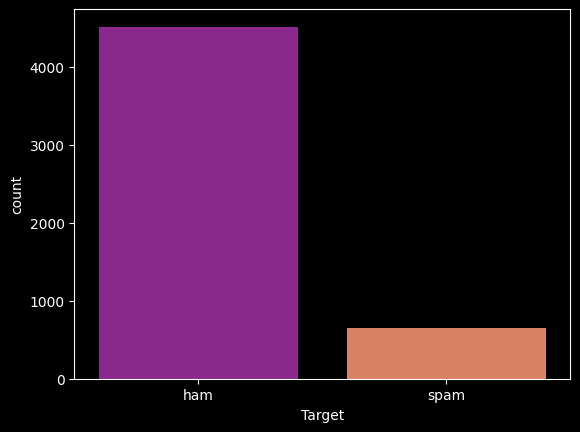

In [20]:
sns.countplot(x="target",hue="target",legend=False, data=df, palette="plasma")
plt.xlabel("Target")
plt.xticks([0, 1], ["ham", "spam"])

plt.show()


### **Here Data is Heavely Imbalanced**

In [21]:
import nltk

In [22]:
df["No. Of Characters"]=df["Text"].apply(len)

In [23]:
df.sample(3)

,target,Text,No. Of Characters
4168,0,Haven't heard anything and he's not answering ...,111
2895,1,pdate_Now - Double mins and 1000 txts on Orang...,163
2458,0,"Cool, I'll text you when I'm on the way",39


In [24]:
df["Total_Words"]=df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head(6)

,target,Text,No. Of Characters,Total_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39


In [26]:
df["Total_Sents"]=df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.shape

(5169, 5)

In [28]:
df.sample(6)

,target,Text,No. Of Characters,Total_Words,Total_Sents
2770,0,No problem. Talk to you later,29,7,2
2398,0,YO YO YO BYATCH WHASSUP?,24,6,1
959,0,Where @,7,2,1
554,0,IÛ÷ll have a look at the frying pan in case i...,135,29,2
86,0,For real when u getting on yo? I only need 2 m...,121,30,3
3318,0,Kay... Since we are out already,32,7,2


In [29]:
df.describe()

,target,No. Of Characters,Total_Words,Total_Sents
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [30]:
df[df["target"]==0][["No. Of Characters","Total_Words","Total_Sents"]].describe()

,No. Of Characters,Total_Words,Total_Sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df["target"]==1][["No. Of Characters","Total_Words","Total_Sents"]].describe()

,No. Of Characters,Total_Words,Total_Sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


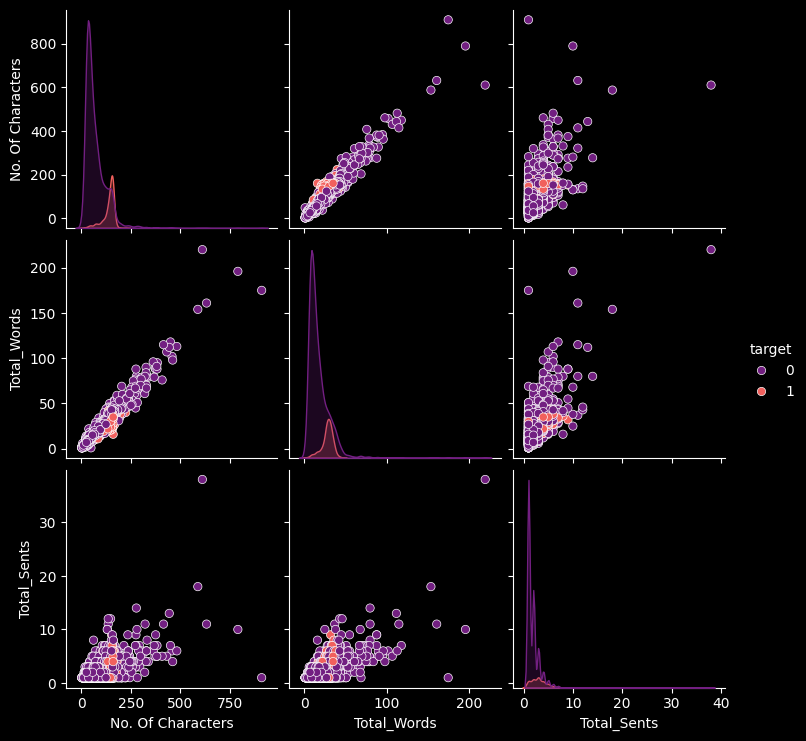

In [32]:
sns.pairplot(df,palette="magma",hue="target")
plt.show()

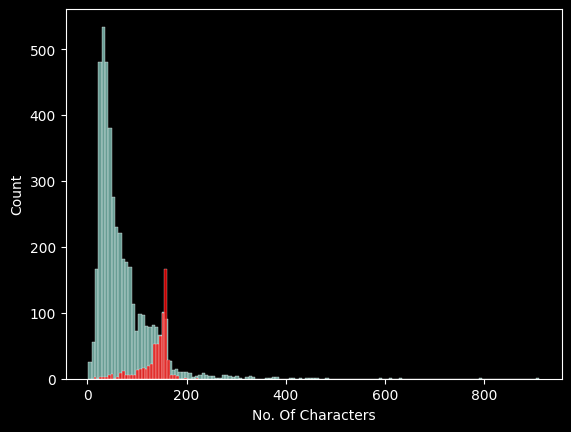

In [33]:
sns.histplot(df[df["target"]==0]["No. Of Characters"])
sns.histplot(df[df["target"]==1]["No. Of Characters"],color="red")
plt.show()

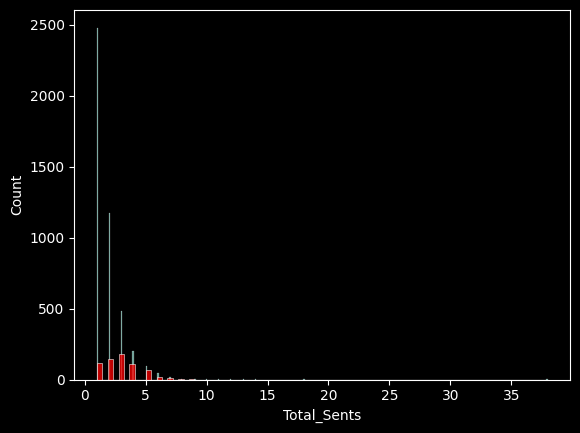

In [34]:
sns.histplot(df[df["target"]==0]["Total_Sents"])
sns.histplot(df[df["target"]==1]["Total_Sents"],color="red")
plt.show()

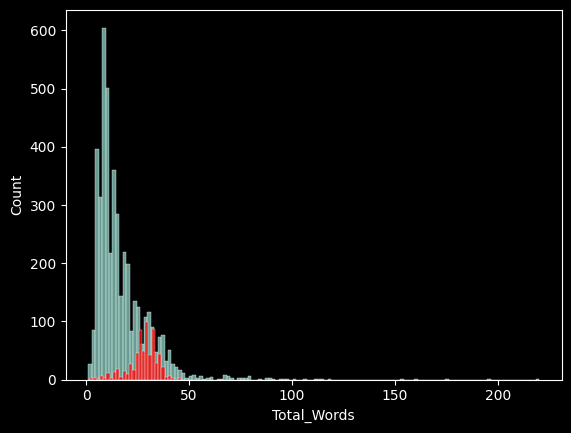

In [35]:
sns.histplot(df[df["target"]==0]["Total_Words"])
sns.histplot(df[df["target"]==1]["Total_Words"],color="red")
plt.show()

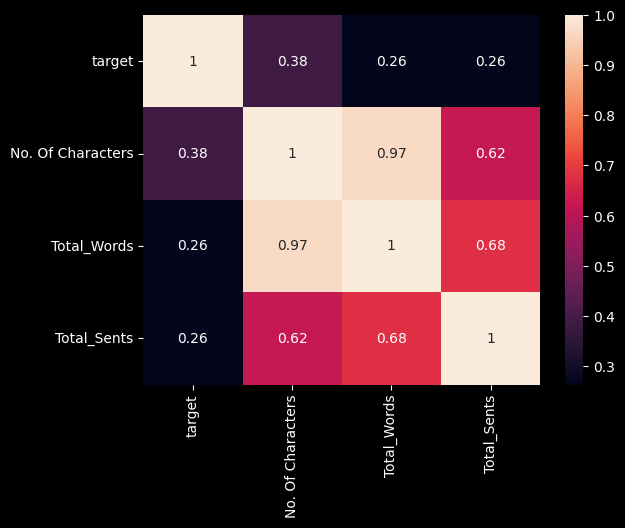

In [36]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [37]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()


In [38]:
def text_preprocess(text):
    lower_text = text.lower()

    text = nltk.word_tokenize(lower_text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english"):
            y.append(i)

    text=y[:]
    y.clear()

    
    for i in text:
        y.append(ps.stem(i))


    return  " ".join(y)


In [39]:
text = "This is an example sentence with stopwords and non-alphanumeric characters! 123"
result = text_preprocess(text)
print(result)

exampl sentenc stopword charact 123


In [40]:
df["Text"]=df["Text"].apply(text_preprocess)

In [41]:
df.sample(6)

,target,Text,No. Of Characters,Total_Words,Total_Sents
1601,0,carlo take sweet time usual let know patti smo...,127,28,1
4714,0,8 min go lunch,26,11,1
5403,0,gd got free ice cream oso wan,40,11,2
4942,0,check mail varma kept copi regard allah,95,15,1
822,1,smsservic yourinclus text credit pl goto 3qxj9...,156,25,4
1738,0,k go sleep well take rest,34,12,2


In [42]:
from wordcloud import WordCloud

In [43]:
wc=WordCloud(height=500,width=500,min_font_size=10,background_color="white")

In [44]:
df[df["target"]==1]

,target,Text,No. Of Characters,Total_Words,Total_Sents
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
5,1,freemsg hey darl 3 week word back like fun sti...,148,39,4
8,1,winner valu network custom select receivea pri...,158,32,5
9,1,mobil 11 month u r entitl updat latest colour ...,154,31,3
11,1,six chanc win cash 100 pound txt csh11 send co...,136,31,3
...,...,...,...,...,...
5537,1,want explicit sex 30 sec ring 02073162414 cost...,90,18,3
5540,1,ask 3mobil 0870 chatlin inclu free min india c...,160,38,6
5547,1,contract mobil 11 mnth latest motorola nokia e...,160,35,5
5566,1,remind o2 get pound free call credit detail gr...,147,30,1


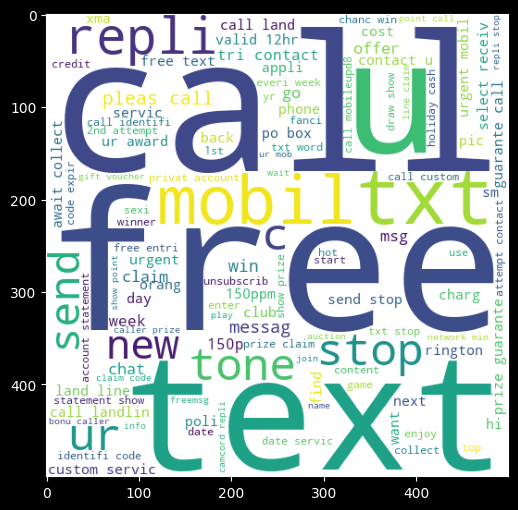

In [45]:
spam_wc=wc.generate(df[df["target"]==1]["Text"].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

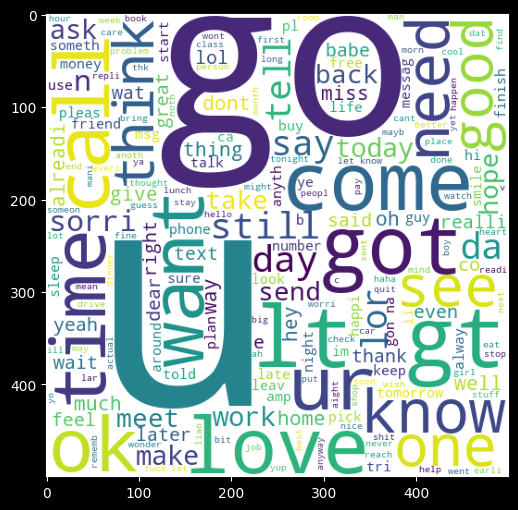

In [46]:
spam_wc=wc.generate(df[df["target"]==0]["Text"].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

In [47]:
df.sample(4)

,target,Text,No. Of Characters,Total_Words,Total_Sents
4349,0,ye rent expens way save,51,13,2
1751,0,think chuckin ur red green n black trainner 2 ...,92,18,1
2016,0,princess kitti shave natur,42,9,1
4050,0,motiv behind everi dark shine light wait find ...,153,30,2


In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cV=CountVectorizer(max_features=3000)
tfidf=TfidfVectorizer(max_features=3000)

In [49]:
X_cv=cV.fit_transform(df["Text"]).toarray()

In [50]:
X_tfidf=tfidf.fit_transform(df["Text"]).toarray()

In [51]:
X_cv.shape

(5169, 3000)

In [52]:
y=df["target"].values

In [53]:
from sklearn.model_selection import train_test_split
X_train_cv,X_test_cv,y_train_cv,y_test_cv=train_test_split(X_cv,y,test_size=0.24,random_state=2,shuffle=True)

In [54]:
X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf=train_test_split(X_tfidf,y,test_size=0.24,random_state=2,shuffle=True)

In [55]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from  sklearn.metrics import accuracy_score,precision_score

In [56]:
svc=SVC(kernel="sigmoid",gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
gnb=GaussianNB()
Bnb=BernoulliNB()
lR=LogisticRegression(solver="liblinear",penalty="l1")
rfc=RandomForestClassifier(n_estimators=50)
adc=AdaBoostClassifier(n_estimators=50)
bC=BaggingClassifier(n_estimators=50)
etc=ExtraTreesClassifier(n_estimators=50)
gbc=GradientBoostingClassifier(n_estimators=50)
dtc=DecisionTreeClassifier(max_depth=5)


In [57]:
clfs={
    "SVC":svc,
    "knc":knc,
    "mnb":mnb,
    "Bnb":Bnb,
    "lR":lR,
    "rfc":rfc,
    "adc":adc,
    "bC":bC,
    "etc":etc,
    "gbc":gbc,
    "dtc":dtc
}

In [58]:
def train_classifier(clf):
    clf.fit(X_train_tfidf,y_train_tfidf)
    y_pred=clf.predict(X_test_tfidf)
    accuracy=accuracy_score(y_test_tfidf,y_pred)
    precision=precision_score(y_test_tfidf,y_pred)
    return accuracy,precision

In [59]:
accuracy_scores=[]
precision_scores=[]

In [60]:
for name,clf in clfs.items():
    current_accuracy,precision_sccuracy=train_classifier(clf=clf)
    print(f"For {name}")
    print(f"Accracy Score {current_accuracy}")
    print(f"Precision Score {precision_sccuracy}")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(precision_sccuracy)

For SVC
Accracy Score 0.975825946817083
Precision Score 0.9774436090225563
For knc
Accracy Score 0.9097502014504432
Precision Score 1.0
For mnb
Accracy Score 0.9726027397260274
Precision Score 1.0
For Bnb
Accracy Score 0.984689766317486
Precision Score 0.9859154929577465
For lR
Accracy Score 0.9605157131345688
Precision Score 0.9736842105263158
For rfc
Accracy Score 0.9742143432715552
Precision Score 0.9770992366412213


C:\Users\SHADO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For adc
Accracy Score 0.9572925060435133
Precision Score 0.9193548387096774
For bC
Accracy Score 0.9629331184528606
Precision Score 0.87248322147651
For etc
Accracy Score 0.9806607574536664
Precision Score 0.9784172661870504
For gbc
Accracy Score 0.951651893634166
Precision Score 0.9369369369369369
For dtc
Accracy Score 0.9307010475423045
Precision Score 0.8141592920353983


In [61]:
accuracy_scores

[0.975825946817083,
 0.9097502014504432,
 0.9726027397260274,
 0.984689766317486,
 0.9605157131345688,
 0.9742143432715552,
 0.9572925060435133,
 0.9629331184528606,
 0.9806607574536664,
 0.951651893634166,
 0.9307010475423045]

In [62]:
performance_df_3000=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_3000":accuracy_scores,"precision_scores_3000":precision_scores})

In [63]:
performance_df=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"precision_scores":precision_scores})

In [64]:
performance_df_3000.sort_values(by=["precision_scores_3000","Accuracy_3000"],ascending=False,ignore_index=True,inplace=True)

In [65]:
performance_df.sort_values(by=["precision_scores","Accuracy"],ascending=False,ignore_index=True,inplace=True)

In [66]:
performance_df_3000

,Algorithm,Accuracy_3000,precision_scores_3000
0,mnb,0.972603,1.000000
1,knc,0.909750,1.000000
2,Bnb,0.984690,0.985915
3,etc,0.980661,0.978417
4,SVC,0.975826,0.977444
5,rfc,0.974214,0.977099
6,lR,0.960516,0.973684
7,gbc,0.951652,0.936937
8,adc,0.957293,0.919355
9,bC,0.962933,0.872483


In [67]:
performance_df

,Algorithm,Accuracy,precision_scores
0,mnb,0.972603,1.000000
1,knc,0.909750,1.000000
2,Bnb,0.984690,0.985915
3,etc,0.980661,0.978417
4,SVC,0.975826,0.977444
5,rfc,0.974214,0.977099
6,lR,0.960516,0.973684
7,gbc,0.951652,0.936937
8,adc,0.957293,0.919355
9,bC,0.962933,0.872483


In [68]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [69]:
performance_df1_3000=pd.melt(performance_df_3000,id_vars="Algorithm")

In [70]:
performance_df1_3000

,Algorithm,variable,value
0,mnb,Accuracy_3000,0.972603
1,knc,Accuracy_3000,0.909750
2,Bnb,Accuracy_3000,0.984690
3,etc,Accuracy_3000,0.980661
4,SVC,Accuracy_3000,0.975826
5,rfc,Accuracy_3000,0.974214
6,lR,Accuracy_3000,0.960516
7,gbc,Accuracy_3000,0.951652
8,adc,Accuracy_3000,0.957293
9,bC,Accuracy_3000,0.962933


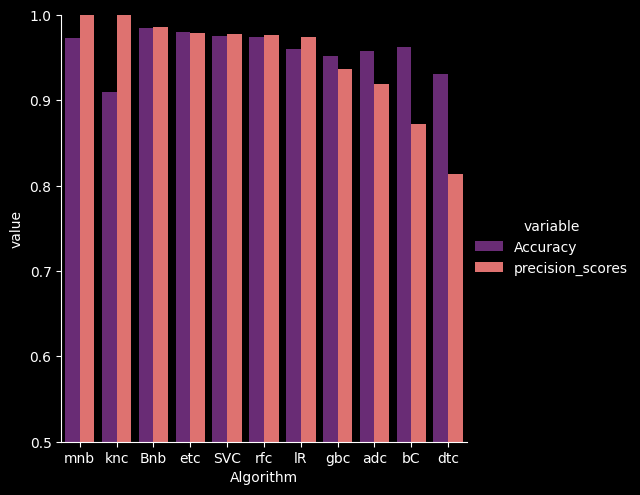

In [71]:
sns.catplot(x="Algorithm",y="value",hue="variable",data=performance_df1,kind="bar",palette="magma",height=5)
plt.ylim(0.5,1.0)
plt.show()

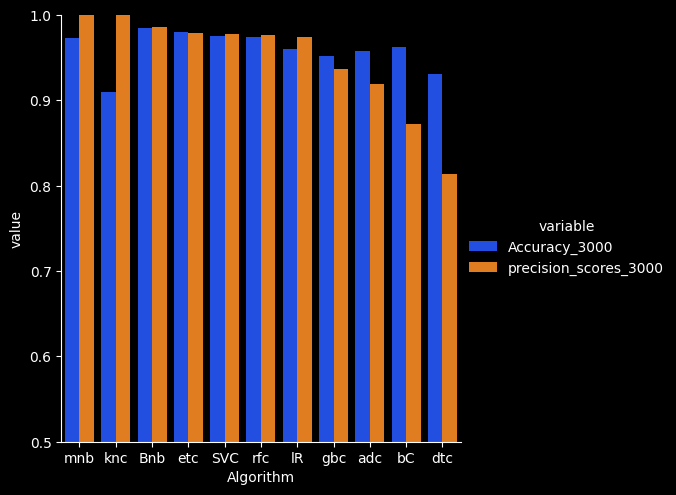

In [72]:
sns.catplot(x="Algorithm",y="value",hue="variable",data=performance_df1_3000,kind="bar",palette="bright",height=5)
plt.ylim(0.5,1.0)
plt.show()

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
rfc=RandomForestClassifier()
val_scores=cross_val_score(estimator=rfc,X=X_train_tfidf,y=y_train_tfidf,scoring="accuracy", cv=5)
val_scores_precise=cross_val_score(estimator=rfc,X=X_train_tfidf,y=y_train_tfidf,scoring=make_scorer(precision_score), cv=5)
print(val_scores.mean())
val_scores_precise.mean()

0.9702124762969806


0.9803603864199999

In [74]:
mnb=MultinomialNB()
val_scores=cross_val_score(estimator=mnb,X=X_train_tfidf,y=y_train_tfidf,scoring="accuracy", cv=5)
val_scores_precise=cross_val_score(estimator=mnb,X=X_train_tfidf,y=y_train_tfidf,scoring=make_scorer(precision_score), cv=5)
print(val_scores.mean())
val_scores_precise.mean()

0.9666475421792191


0.9943987465726597

In [75]:
etc=ExtraTreesClassifier()
val_scores=cross_val_score(estimator=etc,X=X_train_tfidf,y=y_train_tfidf,scoring="accuracy", cv=5)
val_scores_precise=cross_val_score(estimator=etc,X=X_train_tfidf,y=y_train_tfidf,scoring=make_scorer(precision_score), cv=5)
print(val_scores.mean())
val_scores_precise.mean()

0.9725051457836988


0.9664125759266009

In [76]:
bnb=BernoulliNB()
val_scores=cross_val_score(estimator=bnb,X=X_train_tfidf,y=y_train_tfidf,scoring="accuracy", cv=5)
val_scores_precise=cross_val_score(estimator=etc,X=X_train_tfidf,y=y_train_tfidf,scoring=make_scorer(precision_score), cv=5)
print(val_scores.mean())
val_scores_precise.mean()

0.973012430916841


0.9739298513687054

In [102]:
from sklearn.ensemble import VotingClassifier
from sklearn.utils.class_weight import compute_class_weight


In [106]:
class_weights_multinomial = compute_class_weight('balanced', classes=np.unique(y_train_tfidf), y=y_train_tfidf)
class_weights_binomial = compute_class_weight('balanced', classes=np.unique(y_train_tfidf), y=y_train_tfidf)
class_weights_rf = compute_class_weight('balanced', classes=np.unique(y_train_tfidf), y=y_train_tfidf)

clf_multinomial = MultinomialNB()
clf_binomial = BernoulliNB()
clf_rf = RandomForestClassifier(class_weight=dict(zip(np.unique(y_train_tfidf), class_weights_rf)))

voting_classifier = VotingClassifier(estimators=[
    ('multinomial', clf_multinomial),
    ('binomial', clf_binomial),
    ('random_forest', clf_rf)
], voting='soft')

voting_classifier.fit(X_train_tfidf, y_train_tfidf)

y_pred = voting_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test_tfidf, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9830781627719581


In [107]:
precision_score_voting = precision_score(y_test_tfidf, y_pred)
print(f"precision: {precision_score_voting}")

precision: 1.0


In [109]:
from sklearn.ensemble import StackingClassifier
base_classifiers = [
    ('mnb', ExtraTreesClassifier(random_state=42)),
    ('bnb', BernoulliNB()),
    ('rfc', RandomForestClassifier(random_state=42))
]
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=MultinomialNB())
stacking_clf.fit(X_train_tfidf, y_train_tfidf)
y_pred = stacking_clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test_tfidf, y_pred)
print(f"Accuracy: {accuracy}")
precision_score_stacking = precision_score(y_test_tfidf, y_pred)
print(f"precision: {precision_score_stacking}")

Accuracy: 0.8734891216760677
precision: 0.0


C:\Users\SHADO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [110]:
class_weights_multinomial = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_binomial = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_rf = compute_class_weight('balanced', classes=np.unique(y), y=y)

clf_multinomial = MultinomialNB()
clf_binomial = BernoulliNB()
clf_rf = RandomForestClassifier(class_weight=dict(zip(np.unique(y), class_weights_rf)))

voting_classifier = VotingClassifier(estimators=[
    ('multinomial', clf_multinomial),
    ('binomial', clf_binomial),
    ('random_forest', clf_rf)
], voting='soft')

voting_classifier.fit(X_tfidf, y)

VotingClassifier(estimators=[('multinomial', MultinomialNB()),
                             ('binomial', BernoulliNB()),
                             ('random_forest',
                              RandomForestClassifier(class_weight={0: 0.5722984942426926,
                                                                   1: 3.9578866768759573}))],
                 voting='soft')

In [111]:
import pickle

with open('./pklFiles/tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)



with open('./pklFiles/votingClf.pkl', 'wb') as file:
    pickle.dump(voting_classifier, file)